# Assignment 2, Due by 9am Sunday, 10 March 2024

### Name: Mahmoud Ali           Student ID: 202103840

1) [50 pts] Using the 'Buy iphone' dataset shown in the table below, build a decision tree using pen and paper (or any drawing tool). Show the steps of the algorithm and the final decision tree (Use either the Gini Impurity Index or the Entropy).
Submit a PDF file named `tree.pdf` having clear pictures of your decision tree constructions steps as well as the computation done for deciding the appropriate splits.

2) [5 pts] Then use the decision tree to predict the class of the following new instance: Age<=20, Income=Medium, Is_Student=Yes, Credit_Rating=Fair

| Age             | Income | Is_Student | Credit_Rating | Buy_iPhone |
| --------------- | ------ | ---------- | ------------- | ---------- |
| Less than 25    | High   | No         | Fair          | No         |
| Less than 25    | High   | No         | Excellent     | No         |
| 25 to 35        | High   | No         | Fair          | Yes        |
| Greater than 35 | Medium | No         | Fair          | Yes        |
| Greater than 35 | Low    | Yes        | Fair          | Yes        |
| Greater than 35 | Low    | Yes        | Excellent     | No         |
| 25 to 35        | Low    | Yes        | Excellent     | Yes        |
| Less than 25    | Medium | No         | Fair          | No         |
| Less than 25    | Low    | Yes        | Fair          | Yes        |
| Greater than 35 | Medium | Yes        | Fair          | Yes        |
| Less than 25    | Medium | Yes        | Excellent     | Yes        |
| 25 to 35        | Medium | No         | Excellent     | Yes        |
| 25 to 35        | High   | Yes        | Fair          | Yes        |
| Greater than 35 | Medium | No         | Excellent     | No         |

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

2) [Total 13 pts] 
- [1 pt] Load the `dataset.csv` (available on the same folder as this notebook) into a Pandas frame. Display the first 5 rows of the dataset.
- [12 pts] Preprocess the dataset by encoding the categorical variables using the `LabelEncoder` for the target variable and the `OneHotEncoder` for the features.
- Display the first 5 rows of the dataset after the preprocessing.

In [12]:
# Place your code here
df = pd.read_csv("dataset.csv")
print(df.head(5))

target = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')
df = pd.get_dummies(df, prefix=['Age'], columns=['Age'], drop_first=True)
df = pd.get_dummies(df, prefix=['Income'], columns=['Income'], drop_first=True)
df = pd.get_dummies(df, prefix=['Is_Student'], columns=['Is_Student'], drop_first=True)
df = pd.get_dummies(df, prefix=['Credit_Rating'], columns=['Credit_Rating'], drop_first=True)

df.head(5)

               Age  Income Is_Student Credit_Rating Buy_iPhone
0     Less than 25    High         No          Fair         No
1     Less than 25    High         No     Excellent         No
2         25 to 35    High         No          Fair        Yes
3  Greater than 35  Medium         No          Fair        Yes
4  Greater than 35     Low        Yes          Fair        Yes


,Buy_iPhone,Age_Greater than 35,Age_Less than 25,Income_Low,Income_Medium,Is_Student_Yes,Credit_Rating_Fair
0,No,False,True,False,False,False,True
1,No,False,True,False,False,False,False
2,Yes,False,False,False,False,False,True
3,Yes,True,False,False,True,False,True
4,Yes,True,False,True,False,True,True


2) [Total 13 pts]
- [3 pts] Split the dataset into 80% training set and 20% testing sets. 
- [3 pts] Train the model using the training set. 
- [3 pts] Plot the decision tree.
- [4 pts] Report the training accuracy and the testing accuracy of the trained decision tree.



Training Accuracy: 0.92
Testing Accuracy: 0.8461538461538461


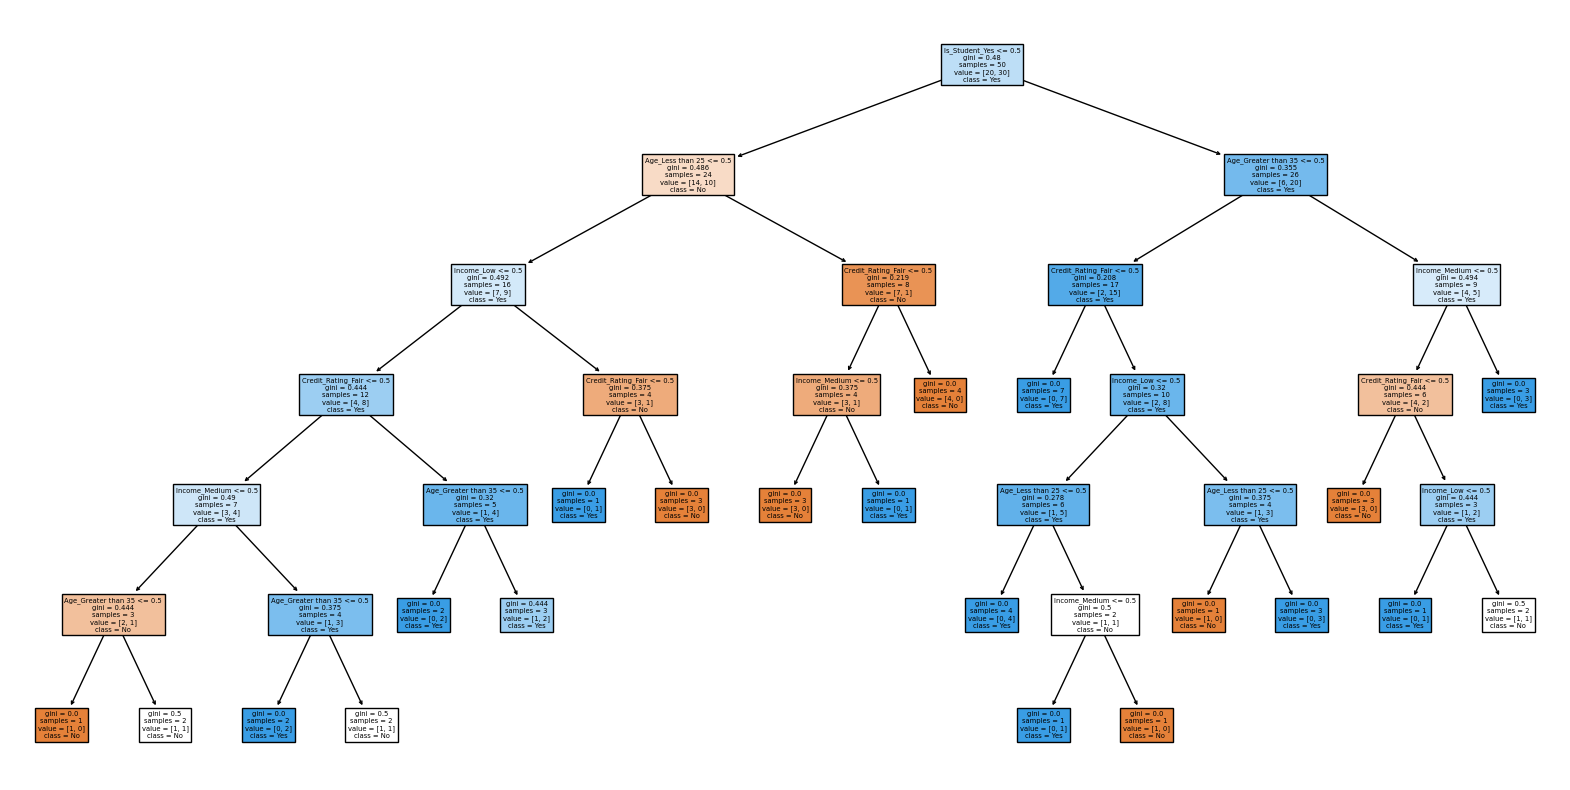

In [79]:
# Place your code here
X = df.drop('Buy_iPhone', axis=1)
y = df['Buy_iPhone']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

# Create the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, )

# Calculate accuracy
print("Training Accuracy:", accuracy_score(clf.predict(X_train), y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))


3) [Total 9 pts] Evaluate the model using the testing set:
- [3 pts] Display the confusion matrix. 
- [2 pts] Display the classification report.
- [4 pts] Add some intrepretation and insights about the model performance.

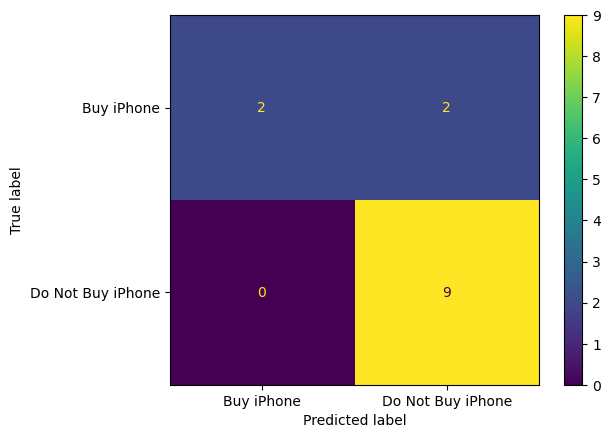

Classification report:
              precision    recall  f1-score   support

          No       1.00      0.50      0.67         4
         Yes       0.82      1.00      0.90         9

    accuracy                           0.85        13
   macro avg       0.91      0.75      0.78        13
weighted avg       0.87      0.85      0.83        13


Interpretations and Insights:
- TP = 2
- TN = 9
- FP = 0
- FN = 2
- The model has a perfect precision for the 'Do Not Buy iPhone' class, 
meaning it is very reliable when it predicts that someone will not buy an iPhone.
- The recall for 'Buy iPhone' is perfect, but the model is more cautious
 with its predictions (lower precision), which could mean that it's better
 at identifying all potential buyers, but at the cost of sometimes incorrectly
 classifying 'Do Not Buy iPhone' instances as potential buyers.
- Lastly, The high f1-score for 'Yes' suggests that the model's balance
 between precision and recall, despite being less than perfect.


In [81]:
# Place your solution here
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Buy iPhone", "Do Not Buy iPhone"])
disp.plot()
plt.show()
cr = metrics.classification_report(y_test, y_pred)
print(f"Classification report:\n" f"{cr}\n")

print("Interpretations and Insights:\n- TP = 2\n- TN = 9\n- FP = 0\n- FN = 2\n- The model has a perfect precision for the 'Do Not Buy iPhone' class, \nmeaning it is very reliable when it predicts that someone will not buy an iPhone.\n- The recall for 'Buy iPhone' is perfect, but the model is more cautious\n with its predictions (lower precision), which could mean that it's better\n at identifying all potential buyers, but at the cost of sometimes incorrectly\n classifying 'Do Not Buy iPhone' instances as potential buyers.\n- Lastly, The high f1-score for 'Yes' suggests that the model's balance\n between precision and recall, despite being less than perfect.")

3) [Total 10 pts] 
- [4 pts] Train a random forest model using the training set and evaluate it using the testing set. Fine-tune the number of trees used and the max_samples (try different numbers) and select the value that yield the best accuracy. Only include the best parameters in the final submittion.
- [3 pts] Report the accuracies for the 5-fold cross validation (use cv=5) including the mean and standard deviation.
- [3 pts] Compare the performance of the decision tree and the random forest model. Include some intrepretation and insights.

In [70]:
# Place your solution here
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=50, max_samples=0.5, random_state=42) # The parameters I included here were obtained by running a for loop and comparing accuracies of different Random Forests to pick the best one.

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculationg cross validation scores
scores = cross_val_score(rf, X, y, cv=5)
print("Cross Validation: %0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))

# Calculate accuracy
print("Testing Accuracy (Random Forest):", accuracy_score(y_test, y_pred))
print("Testing Accuracy (Tree):", accuracy_score(y_test, clf.predict(X_test)))

cr = metrics.classification_report(y_test, y_pred)
print(f"\nClassification report (Random Forest):\n" f"{cr}\n")

cr = metrics.classification_report(y_test, clf.predict(X_test))
print(f"Classification report (Tree):\n" f"{cr}\n")

# Interpretations and Insights
print("Interpretations and Insights:\n- The accuracy of the Random Forest is noticably higher compared to the normal Tree.\n- By looking at the F1 scores of both models we can clearly see that the Random Forest performs significantly better.\n- Using the Random Forest is clearly the better option.")

Cross Validation: 0.78 accuracy with a standard deviation of 0.06

Testing Accuracy (Random Forest): 0.9230769230769231
Testing Accuracy (Tree): 0.8461538461538461

Classification report (Random Forest):
              precision    recall  f1-score   support

          No       1.00      0.75      0.86         4
         Yes       0.90      1.00      0.95         9

    accuracy                           0.92        13
   macro avg       0.95      0.88      0.90        13
weighted avg       0.93      0.92      0.92        13


Classification report (Tree):
              precision    recall  f1-score   support

          No       1.00      0.50      0.67         4
         Yes       0.82      1.00      0.90         9

    accuracy                           0.85        13
   macro avg       0.91      0.75      0.78        13
weighted avg       0.87      0.85      0.83        13


Interpretations and Insights:
- The accuracy of the Random Forest is noticably higher compared to the normal T

- Submit to your GitHub repository (1) the PDF file named `tree.pdf` and (2) this Jupyter Notebook including your implementation code and the execution results.